<table align="left">
  <td>
    <a href="https://tinyurl.com/2e4vd85b" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Problema de Clasificación - Multi-Class

Fashion MNIST es un dataset de imágenes de ropa, como zapatillas y camisetas. Cada imagen es en escala de grises de 28x28 pixeles, con un total de 10 clases de ropa diferentes. Este dataset es muy similar al dataset MNIST, que es un dataset de dígitos escritos a mano (0, 1, 2, etc).

Clases de ropa:

- Camiseta/Top (T-shirt/top)
- Pantalón (Trouser)
- Pullover (Pullover)
- Vestido (Dress)
- Abrigo (Coat)
- Sandalia (Sandal)
- Camisa (Shirt)
- Zapatilla (Sneaker)
- Bolso (Bag)
- Bota (Ankle boot)

Este dataset intenta ser un reemplazo más desafiante para el dataset MNIST. Como MNIST, cada imagen es asignada a una etiqueta de 0 a 9. Sin embargo, las imágenes no son de dígitos escritos a mano, sino de artículos de ropa de diferentes tipos.

In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(tf.__version__)

2.6.0


## Cargar el dataset de Fashion MNIST

In [28]:
# Load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [29]:
print(f"Training sample: \n{X_train[0]}\n")
print(f"Training label: \n{y_train[0]}\n")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [30]:
# check the shape of the data
print(f"Training sample shape: \n{X_train[0].shape}\n")
print(f"Training label shape: \n{y_train[0].shape}\n")

Training sample shape: 
(28, 28)

Training label shape: 
()



In [31]:
# lista con los nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

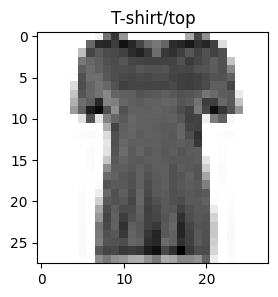

In [32]:
# show the first image
index = 10
plt.figure(figsize=(3,3))
plt.imshow(X_train[index], cmap=plt.cm.binary);
plt.title(class_names[y_train[index]]);

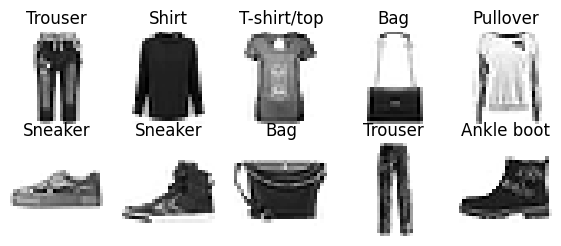

In [33]:
# Graficar varias imagenes del dataset fashion_mnist
plt.figure(figsize=(7,7))
for i in range(10):
    ax = plt.subplot(5,5,i+1)
    random_index = np.random.choice(range(len(X_train)))
    plt.imshow(X_train[random_index], cmap=plt.cm.binary)
    plt.title(class_names[y_train[random_index]])
    plt.axis(False)

## Construir un modelo de clasificación multi-clase

Para construir el modelo de clasificación multi-clase, se puede utilizar una arquitectura parecida a la de la clasificación binaria. La única diferencia es que la capa de salida tiene 10 neuronas en lugar de 1, y usa una función de activación softmax en lugar de una función de activación sigmoide. Además, se usa la función de pérdida de entropía cruzada categórica en lugar de la función de pérdida de entropía cruzada binaria.

- Input: 28x28 = 784 (vector con la forma de la imagen)
- output: 10 (10 clases de ropa)
- funcion de perdida: 
    - Si las etiquetas se encuentran codificadas en formato one-hot se usa la función `tf.keras.losses.CategoricalCrosstentropy()`
    - Si las etiquetas se encuentran codificadas en formato entero se usa la función `tf.keras.losses.SparseCategoricalCrossentropy()`
- funcion de activacion en la salida: `softmax`



<a href="https://ibb.co/c8Rxz4Y"><img src="https://i.ibb.co/mydSQfN/imagen-2022-12-05-101854167.png" alt="nn_class" border="0"></a>

In [34]:
# Los datos necesitan aplanarse para poder ser procesados por la red neuronal
flatten_layer = tf.keras.layers.Flatten(input_shape=(28, 28))
flatten_layer(X_train[:1]).shape

TensorShape([1, 784])

In [35]:
# Funciones de perdida
# Las etiquetas se encuentran en formato numerico, por lo que se debe usar la funcion de perdida sparse_categorical_crossentropy
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [36]:
# si las etiquetas estuvieran en formato one-hot, se debe usar la funcion de perdida categorical_crossentropy
y_train_one_hot = tf.one_hot(y_train, depth=10)
y_test_one_hot = tf.one_hot(y_test, depth=10)

In [37]:
# set random seed
tf.random.set_seed(42)

# create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model no normalizado
history_1 = model_1.fit(X_train, y_train_one_hot,epochs=10,
                        batch_size=64,
                        validation_data=(X_test, y_test_one_hot), verbose=1)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 2.3926 - accuracy: 0.1320 - val_loss: 2.0549 - val_accuracy: 0.1990
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 1.8327 - accuracy: 0.2058 - val_loss: 1.7419 - val_accuracy: 0.2594
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 1.6921 - accuracy: 0.2572 - val_loss: 1.6592 - val_accuracy: 0.2629
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 1.6375 - accuracy: 0.2732 - val_loss: 1.6281 - val_accuracy: 0.2765
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 1.6169 - accuracy: 0.2772 - val_loss: 1.6080 - val_accuracy: 0.2909
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 1.6082 - accuracy: 0.2817 - val_loss: 1.5917 - val_accuracy: 0.3015
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 1.5940 - accuracy: 0.2915 - val_loss: 1.5911 - val_accuracy: 0.2828
Epoch 

## Normalizar las imágenes

Antes de entrenar el modelo, las imágenes deben ser normalizadas. Para ello, se divide los valores de los pixeles por 255. Es importante que el *training set* y el *testing set* se normalicen de la misma forma.

La normalización de los datos consiste en escalar los valores de los pixeles de las imágenes a un rango entre 0 y 1 antes de alimentar el modelo de red neuronal. Para ello, se divide los valores de los pixeles por 255. Es importante que el *training set* y el *testing set* se normalicen de la misma forma.

:key: **Nota:** Las redes neuronales son sensibles a la escala de los datos de entrada. Si no se normalizan los datos, los valores de los pixeles de las imágenes pueden tener un rango entre 0 y 255. Si se alimenta a la red neuronal con estos valores, la función de activación de la primera capa (por ejemplo, una función de activación sigmoide) puede saturar fácilmente, lo que hará que la red neuronal no pueda aprender nada. Por lo tanto, es una buena práctica normalizar los datos de entrada.

In [39]:
# verificar los valores minimos y maximos de los pixeles
X_train.min(), X_train.max()

(0, 255)

In [40]:
# normalizar los datos
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

# verificar los valores minimos y maximos de los pixeles
X_train_norm.min(), X_train_norm.max()

(0.0, 1.0)

In [44]:
# set random seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model no normalizado
history_2 = model_2.fit(X_train_norm, y_train_one_hot,epochs=10,
                        batch_size=32,
                        validation_data=(X_test_norm, y_test_one_hot), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

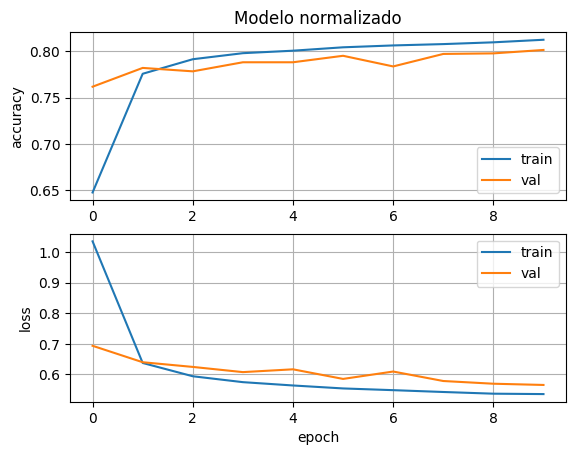

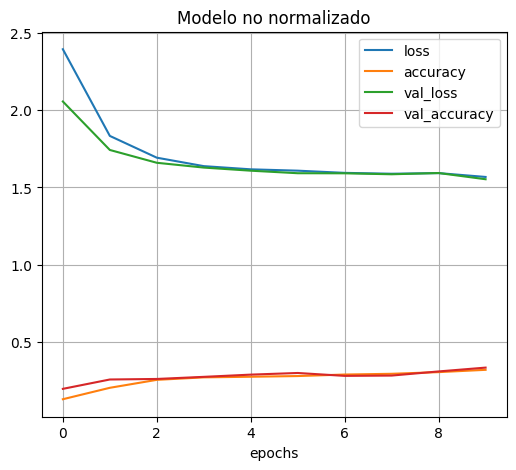

In [50]:
plt.subplot(211)
plt.title('Modelo normalizado')
plt.plot(history_2.history['accuracy'])  
plt.plot(history_2.history['val_accuracy'])
plt.ylabel('accuracy')  
plt.legend(['train', 'val'], loc='lower right')
plt.grid(True)

 # summarize history for loss  
plt.subplot(212)  
plt.plot(history_2.history['loss'])  
plt.plot(history_2.history['val_loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper right')  
plt.grid(True)

plt.show()  

pd.DataFrame(history_1.history).plot(figsize=(6, 5))
plt.title("Modelo no normalizado")
plt.xlabel("epochs")
plt.legend()
plt.grid(True);

:key: **Nota:** El mismo modelo con los mismos pesos y el mismo conjunto de datos de entrenamiento puede dar diferentes resultados si los datos de entrada no se normalizan. Para comparar el rendimiento de dos modelos los datos de entrada deben ser normalizados de la misma forma. Asi como la arquitectura del modelo.



## Encontrando la tasa de aprendizaje óptima

In [51]:
# set random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# crear learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch / 20))

# fit the model normalizado
history_3 = model_3.fit(X_train_norm, y_train,epochs=40,
                        batch_size=32,
                        validation_data=(X_test_norm, y_test), callbacks = [lr_scheduler], verbose=1)

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

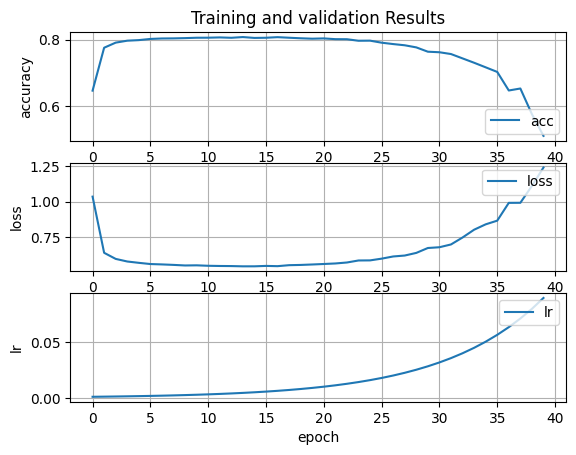

In [52]:
plt.subplot(311)
plt.title('Training, validation and LR Results')
plt.plot(history_3.history['accuracy'])  
plt.ylabel('accuracy')  
plt.legend(['acc'], loc='lower right')
plt.grid(True)

 # summarize history for loss  
plt.subplot(312)  
plt.plot(history_3.history['loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['loss'], loc='upper right')  
plt.grid(True)

 # summarize history for loss  
plt.subplot(313)  
plt.plot(history_3.history['lr'])  
plt.ylabel('lr')  
plt.xlabel('epoch')  
plt.legend(['lr'], loc='upper right')  
plt.grid(True)

plt.show()  


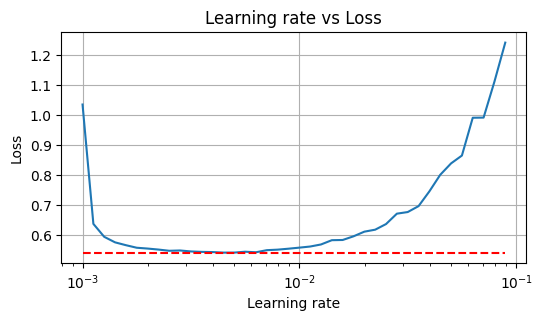

In [54]:
# Plot de la función de pérdida vs la tasa de aprendizaje
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.figure(figsize=(6, 3))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")
plt.grid(True)
plt.hlines(min(history_3.history["loss"]), min(lrs), max(lrs), color="r", linestyle="--")
plt.show()

La taza de aprendizaje ideal se encuentra cerca al valor 0.001. A partir de este valor, la función de pérdida empieza a diverger. Por lo tanto, se puede usar un valor de 0.001 como taza de aprendizaje.

In [56]:
# set random seed
tf.random.set_seed(42)

# create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])


# fit the model normalizado
history_4 = model_4.fit(X_train_norm, y_train,epochs=40,
                        batch_size=32,
                        validation_data=(X_test_norm, y_test), verbose=0)

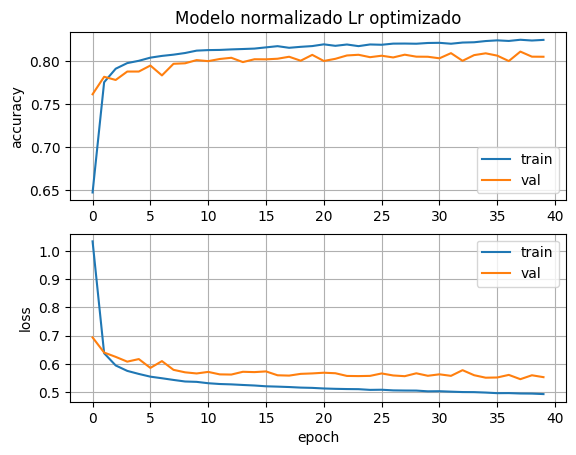

In [57]:
plt.subplot(211)
plt.title('Modelo normalizado Lr optimizado')
plt.plot(history_4.history['accuracy'])  
plt.plot(history_4.history['val_accuracy'])
plt.ylabel('accuracy')  
plt.legend(['train', 'val'], loc='lower right')
plt.grid(True)

 # summarize history for loss  
plt.subplot(212)  
plt.plot(history_4.history['loss'])  
plt.plot(history_4.history['val_loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper right')  
plt.grid(True)

plt.show()  

## Metricas de rendimiento

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

y_pred = model_4.predict(X_test_norm).argmax(axis=1)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

# print classification reporty_

print(classification_report(y_test, y_pred))

Precision: 80.62%
Recall: 80.53%
F1 score: 80.45%
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1000
           1       0.95      0.95      0.95      1000
           2       0.70      0.59      0.64      1000
           3       0.82      0.79      0.80      1000
           4       0.70      0.73      0.71      1000
           5       0.88      0.94      0.91      1000
           6       0.51      0.51      0.51      1000
           7       0.91      0.90      0.91      1000
           8       0.93      0.91      0.92      1000
           9       0.95      0.91      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



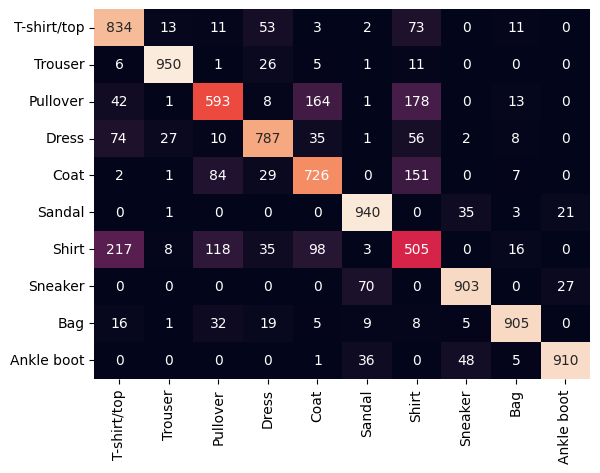

In [63]:
# Matriz de confusión del modelo 4
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d" ,xticklabels=class_names,
                 yticklabels=class_names,cbar=False);

A continuación se crea una función para graficar imagenes de prueba con sus etiquetas reales y las etiquetas predichas.

In [64]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

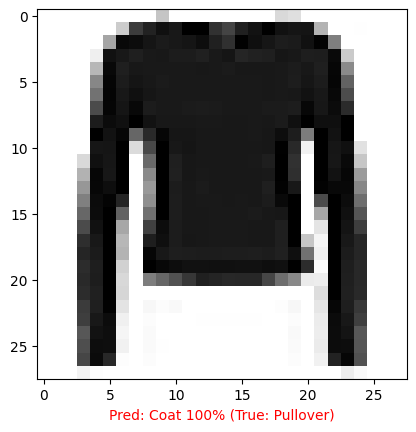

In [69]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4, 
                  images=X_test, 
                  true_labels=y_test, 
                  classes=class_names)

## Crear modelo Final

In [72]:
# set random seed
tf.random.set_seed(42)

# create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])


# fit the model normalizado
history_5 = model_5.fit(X_train_norm, y_train,epochs=40,
                        batch_size=32,
                        validation_data=(X_test_norm, y_test), verbose=0)

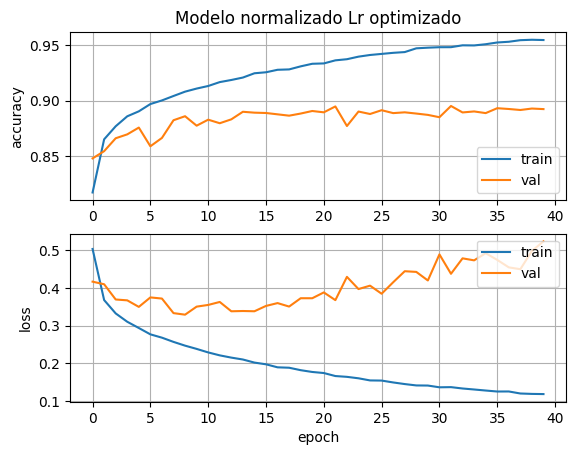

In [73]:
plt.subplot(211)
plt.title('Modelo normalizado Lr optimizado')
plt.plot(history_5.history['accuracy'])  
plt.plot(history_5.history['val_accuracy'])
plt.ylabel('accuracy')  
plt.legend(['train', 'val'], loc='lower right')
plt.grid(True)

 # summarize history for loss  
plt.subplot(212)  
plt.plot(history_5.history['loss'])  
plt.plot(history_5.history['val_loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper right')  
plt.grid(True)

plt.show()  

In [75]:
y_pred = model_5.predict(X_test_norm).argmax(axis=1)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test,y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

# print classification reporty_

print(classification_report(y_test, y_pred))

Precision: 89.25%
Recall: 89.25%
F1 score: 89.21%
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.78      0.80      1000
           3       0.90      0.90      0.90      1000
           4       0.79      0.85      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.73      0.69      0.71      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.94      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



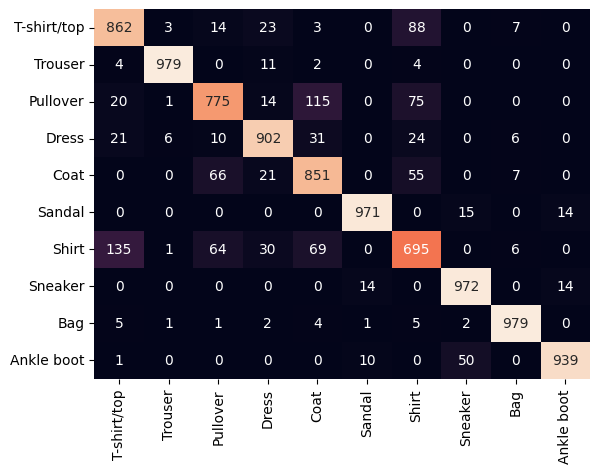

In [76]:
# Matriz de confusión del modelo 4
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d" ,xticklabels=class_names,
                 yticklabels=class_names,cbar=False);

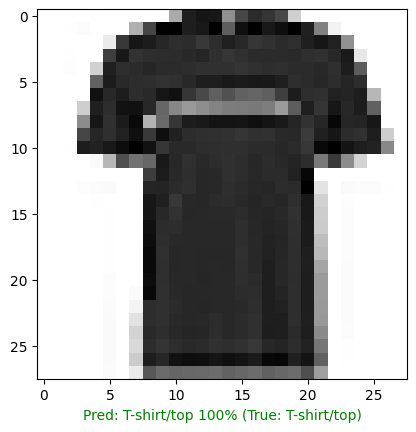

In [94]:
# Check out a random image as well as its prediction
plot_random_image(model=model_5, 
                  images=X_test, 
                  true_labels=y_test, 
                  classes=class_names)

In [95]:
predictions = model_5.predict(X_test)

In [96]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

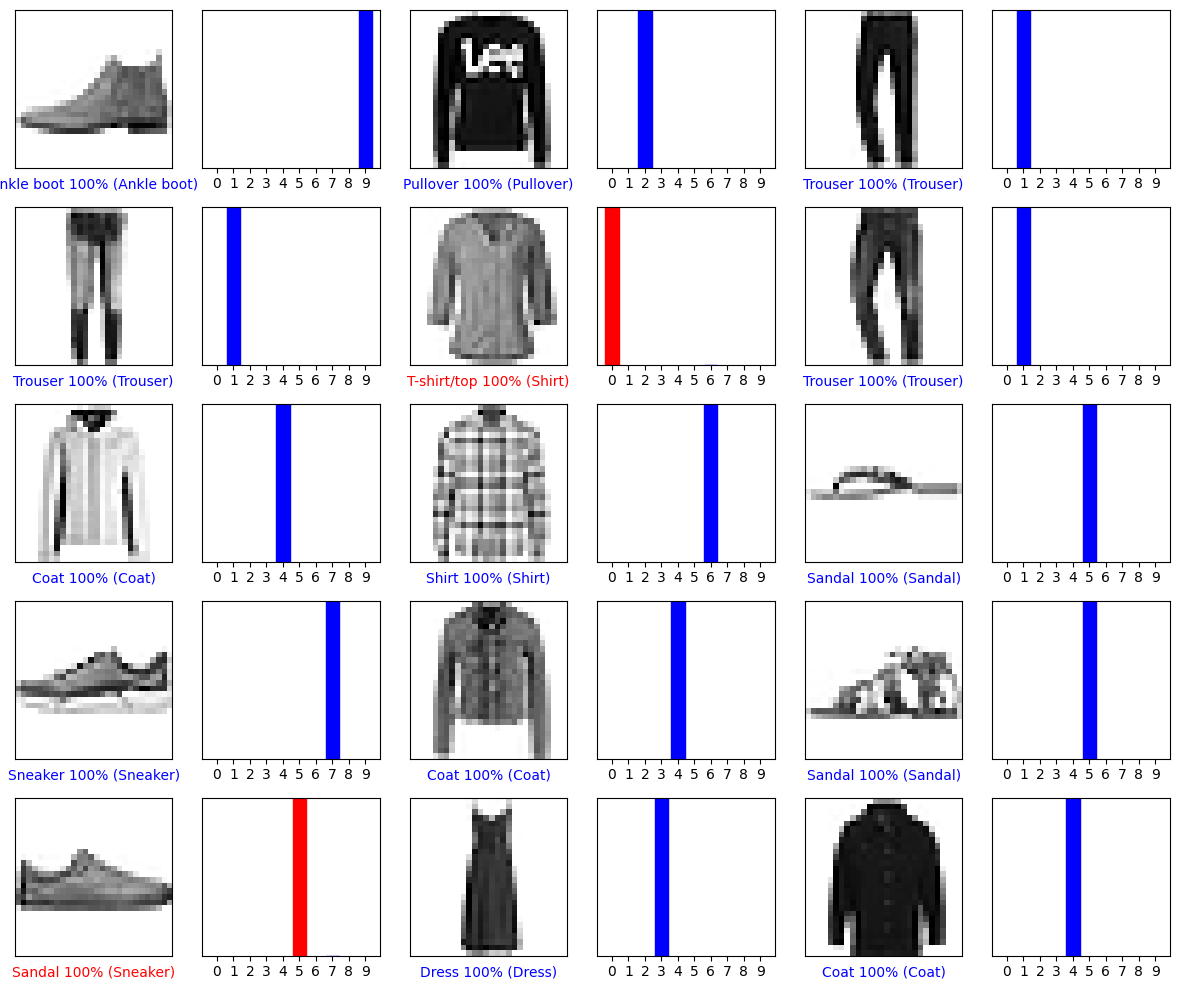

In [98]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()